In [1]:
# Importing Necessary libraries
import nltk
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import defaultdict


import warnings
warnings.filterwarnings('ignore')


# Columns

**article_text: the text of the article retrieved via newspaper3k package.

event_location: the geographical location - collected from GDELT.

average_tone: measures the impact of the event - collected from GDELT.

article_date: article's publish date - collected from GDELT.

article_ID: GDELT ID , unique among the dataset's articles.

article_URL: the direct URL for the published article in its source website.

MBFC_factuality_label: factuality label for the source from MBFC.

article_URL

MBFC_factuality_label

URL_to_MBFC_page

source_name

MBFC_notes_about_source

MBFC_bias_label

source_URL

propaganda_label**


In [2]:
column_names = ['text', 'location', 'tone', 'date', 'ID','URL','MBFC_factuality_label', 'URL.1',
                'MBFC_factuality_label.1','URL_to_MBFC_page', 'source_name', 'MBFC_notes_about_source',
               'MBFC_bias_label','source_URL','propaganda_label']

In [3]:
# Loading training data
train_data = pd.read_csv('proppy_1.0.train.tsv', sep='\t', names =column_names)
train_data.head()

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
0,"Et tu, Rhody? A recent editorial in the Provi...","Rhode Island, United States",-3.181818,2018-02-02,727600136,http://www.courant.com/opinion/editorials/hc-e...,unknown,"Editorial: Why, Rhode Island, Why?",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
1,A recent post in The Farmington Mirror — our t...,"Rhode Island, United States",-0.424328,2018-02-17,731714618,http://www.courant.com/features/hc-fea-avoidin...,Teresa M. Pelham,A Tip For Navigating The Dreaded School Drop-O...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
2,"President Donald Trump, as he often does while...","Florida, United States",-2.469136,2018-02-17,731714635,http://www.courant.com/nation-world/ct-trump-f...,Josh Dawsey,Trump focuses on praising first responders in ...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
3,"February is Black History Month, and nothing l...","Bristol, Bristol, City of, United Kingdom",-0.894632,2018-02-06,728627182,http://www.courant.com/entertainment/museums-g...,Susan Dunne,"African Slave-Trading Center, Frederick Dougla...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
4,"The snow was so heavy, whipped up by gusting w...","Connecticut, United States",-4.800000,2018-02-06,728627443,http://www.courant.com/weather/hc-br-blizzard-...,Nicholas Rondinone,"40 Years Ago, Blizzard Of '78 Walloped Connect...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1


In [4]:
# target variable
train_data.propaganda_label.unique()

array([-1,  1], dtype=int64)

In [5]:
# Loading validation data
valid_data = pd.read_csv('proppy_1.0.dev.tsv', sep='\t', names =column_names)

valid_data.head()

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
0,Convened to examine the causes of civil unrest...,"Chicago, Illinois, United States",-4.593640,2018-02-27,734202079,http://www.courant.com/nation-world/ct-no-prog...,Tracy Jan,Report: No progress for African-Americans on h...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
1,Discriminating against someone on the basis of...,"Chicago, Illinois, United States",-1.566952,2018-02-27,734203497,http://www.courant.com/nation-world/ct-anti-di...,Matt Zapotosky,Employers can't discriminate based on sexual o...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
2,"Bill Cosby's 44-year-old daughter, Ensa Cosby,...","Philadelphia, Pennsylvania, United States",-6.150660,2018-02-27,734204589,http://www.courant.com/entertainment/ct-cosby-...,Bob Salsberg,"Bill Cosby's daughter Ensa, 44, dies in Massac...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
3,"The fast-moving, powerful theatrical locomotiv...","New York, United States",1.524390,2018-02-27,734213466,http://www.courant.com/entertainment/arts-thea...,Christopher Arnott,"'Murder On The Orient Express' A Funny, Fast-P...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
4,It's Friday. It's National Pizza Day. Grab lif...,"West Hartford, Connecticut, United States",1.197605,2018-02-09,729554384,http://www.courant.com/features/food/hc-nation...,Nicholas Rondinone,You Can Celebrate National Pizza Day Right Here,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1


In [6]:
# Loading testing data

test_data = pd.read_csv('proppy_1.0.test.tsv', sep='\t', names =column_names)
test_data.head()

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
0,Eat in Connecticut teamed up with End Hunger C...,"Shiraz, Fars, Iran",0.781250,2018-02-05,728352356,http://www.courant.com/community/west-hartford...,Dennis Hohenberger,Pub Crawl Benefits End Hunger Connecticut,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
1,Owners of an old Pennsylvania power plant that...,"Brunner Island, Pennsylvania, United States",-1.615799,2018-02-15,730955196,http://www.courant.com/politics/hc-pol-brunner...,Gregory B. Hladky,Sierra Club Reaches Deal On Plant Polluting Co...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
2,The majority owner of President Donald Trump's...,"Manhattan, New York, United States",-4.177546,2018-02-25,733772812,http://www.courant.com/nation-world/ct-trump-p...,Ana Cerrud,"Police, yelling, power turned off: Confrontati...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
3,Connecticut’s most likely option for using tol...,"Connecticut, United States",-7.200811,2018-01-04,727857752,http://www.courant.com/politics/hc-pol-toll-co...,Gregory B. Hladky,'Congestion Pricing' Is A Likely Option If Con...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
4,Escaped prisoner Jerry Mercado is back in Conn...,"Georgia, United States",-6.534091,2018-02-03,727792592,http://www.courant.com/breaking-news/hc-prison...,David Owens,Escaped Prisoner Jerry Mercado Back In Connect...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1


In [7]:
print("Train shape:",train_data.shape)
print("valid shape:",valid_data.shape)
print("Test shape:",test_data.shape)

Train shape: (35986, 15)
valid shape: (5125, 15)
Test shape: (10159, 15)


# Data Cleaning

In [8]:
train_data.head()

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
0,"Et tu, Rhody? A recent editorial in the Provi...","Rhode Island, United States",-3.181818,2018-02-02,727600136,http://www.courant.com/opinion/editorials/hc-e...,unknown,"Editorial: Why, Rhode Island, Why?",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
1,A recent post in The Farmington Mirror — our t...,"Rhode Island, United States",-0.424328,2018-02-17,731714618,http://www.courant.com/features/hc-fea-avoidin...,Teresa M. Pelham,A Tip For Navigating The Dreaded School Drop-O...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
2,"President Donald Trump, as he often does while...","Florida, United States",-2.469136,2018-02-17,731714635,http://www.courant.com/nation-world/ct-trump-f...,Josh Dawsey,Trump focuses on praising first responders in ...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
3,"February is Black History Month, and nothing l...","Bristol, Bristol, City of, United Kingdom",-0.894632,2018-02-06,728627182,http://www.courant.com/entertainment/museums-g...,Susan Dunne,"African Slave-Trading Center, Frederick Dougla...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
4,"The snow was so heavy, whipped up by gusting w...","Connecticut, United States",-4.800000,2018-02-06,728627443,http://www.courant.com/weather/hc-br-blizzard-...,Nicholas Rondinone,"40 Years Ago, Blizzard Of '78 Walloped Connect...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1


In [9]:
train_data.tail()

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
35981,From The Telegraph: Towns in Brazil have beco...,"Hollywood, California, United States",-3.193277,2018-09-10,785781276,https://www.lewrockwell.com/2018/09/no_author/...,NaN,Escape to Boa Vista,unknown,unknown,lewrockwell.com,unknown,unknown,lewrockwell.com,1
35982,The second episode of Consortium News on Flash...,"Pacifica, California, United States",0.526316,2018-09-10,785781322,https://www.lewrockwell.com/2018/09/no_author/...,Jim Macgregor,Flash Points,unknown,unknown,lewrockwell.com,unknown,unknown,lewrockwell.com,1
35983,"It is beginning. Actually, it’s been happenin...","White House, District of Columbia, United States",-3.455285,2018-09-10,785781455,https://www.lewrockwell.com/2018/09/eric-peter...,Eric Peters,Tesla’s Death Dive,unknown,unknown,lewrockwell.com,unknown,unknown,lewrockwell.com,1
35984,Justin’s note: As regular Dispatch readers kno...,United States,-1.052049,2018-09-10,785781711,https://www.lewrockwell.com/2018/09/doug-casey...,Doug Casey,Doug Casey on the ‘Politically Correct’ Movement,unknown,unknown,lewrockwell.com,unknown,unknown,lewrockwell.com,1
35985,“No man can serve two masters” (Matthew 6:24)....,United States,0.256410,2018-09-11,786060460,https://www.lewrockwell.com/2018/09/laurence-m...,Laurence M. Vance,Serving Two Masters,unknown,unknown,lewrockwell.com,unknown,unknown,lewrockwell.com,1


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35986 entries, 0 to 35985
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   text                     35986 non-null  object 
 1   location                 35986 non-null  object 
 2   tone                     35986 non-null  float64
 3   date                     35986 non-null  object 
 4   ID                       35986 non-null  int64  
 5   URL                      35986 non-null  object 
 6   MBFC_factuality_label    26902 non-null  object 
 7   URL.1                    35986 non-null  object 
 8   MBFC_factuality_label.1  35986 non-null  object 
 9   URL_to_MBFC_page         35986 non-null  object 
 10  source_name              35986 non-null  object 
 11  MBFC_notes_about_source  29979 non-null  object 
 12  MBFC_bias_label          35986 non-null  object 
 13  source_URL               35986 non-null  object 
 14  propaganda_label      

In [11]:
# checking null values present in the dataset
train_data.isnull().sum()

text                          0
location                      0
tone                          0
date                          0
ID                            0
URL                           0
MBFC_factuality_label      9084
URL.1                         0
MBFC_factuality_label.1       0
URL_to_MBFC_page              0
source_name                   0
MBFC_notes_about_source    6007
MBFC_bias_label               0
source_URL                    0
propaganda_label              0
dtype: int64

In [12]:
train_data['text'][1]

'A recent post in The Farmington Mirror — our town’s version of The Onion — encouraged parents to take advantage of a shuttle service offered by the town, which not only brings your children to schools from locations “in close proximity to your home,” but is also free!  “The decision follows complaints made on social media regarding long parent drop-off lines,” the post reads. The Mirror notes that the shuttles are “easily identifiable by their bright yellow color and traffic-stopping flashing red lights.”  It appears that the practice of driving students to and from school in privately owned cars began sometime between the 1980s (when I was in school, and there was no such thing as a “drop-off line”) and the mid-2000s, when some parents seemed aghast to learn that I actually let my children ride the school bus. Sometimes both ways!  When we moved to a house within walking distance of our neighborhood elementary school, however, I became a part of this Drop-Off Line Tribe. A number of 

In [13]:
train_data['text'][100]

'Prosecutors filed felony charges on Wednesday against an immigrant illegally living in the U.S. who is suspected in a drunken-driving crash that killed Indianapolis Colts linebacker Edwin Jackson and an Uber driver.  Manuel Orrego-Savala, who is from Guatemala and has twice been deported from the U.S., is charged with causing death while driving intoxicated and leaving the scene of an accident. The 37-year-old said little during his initial court hearing, responding through an interpreter as the judge explained the proceedings and charges.  "He\'s very distraught to say the least," said his lawyer, Jorge Torres. "He\'s very confused."  Investigators said Orrego-Savala was driving the pickup truck that hit Jackson and his Uber driver, 54-year-old Jeffrey Monroe, while the men were standing outside Monroe\'s car early Sunday along Interstate 70. Court documents allege a blood test conducted at a hospital determined Orrego-Savala had a blood-alcohol level of 0.19 percent, more than doubl

In [14]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5125 entries, 0 to 5124
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   text                     5125 non-null   object 
 1   location                 5125 non-null   object 
 2   tone                     5125 non-null   float64
 3   date                     5125 non-null   object 
 4   ID                       5125 non-null   int64  
 5   URL                      5125 non-null   object 
 6   MBFC_factuality_label    3451 non-null   object 
 7   URL.1                    5125 non-null   object 
 8   MBFC_factuality_label.1  5125 non-null   object 
 9   URL_to_MBFC_page         5125 non-null   object 
 10  source_name              5125 non-null   object 
 11  MBFC_notes_about_source  4513 non-null   object 
 12  MBFC_bias_label          5125 non-null   object 
 13  source_URL               5125 non-null   object 
 14  propaganda_label        

In [15]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10159 entries, 0 to 10158
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   text                     10159 non-null  object 
 1   location                 10159 non-null  object 
 2   tone                     10159 non-null  float64
 3   date                     10159 non-null  object 
 4   ID                       10159 non-null  int64  
 5   URL                      10159 non-null  object 
 6   MBFC_factuality_label    6634 non-null   object 
 7   URL.1                    10159 non-null  object 
 8   MBFC_factuality_label.1  10159 non-null  object 
 9   URL_to_MBFC_page         10159 non-null  object 
 10  source_name              10159 non-null  object 
 11  MBFC_notes_about_source  8961 non-null   object 
 12  MBFC_bias_label          10159 non-null  object 
 13  source_URL               10159 non-null  object 
 14  propaganda_label      

In [16]:
# Selecting necessary columns: input and output variable
col_to_select = ['text', 'propaganda_label']

# filtering the training data with selected columns
train_data = train_data[col_to_select]


In [17]:
## checking for number of duplicate rows in each column
train_data[train_data.duplicated()].sum()

# There are no rows present as duplicated in the dataset

text                0.0
propaganda_label    0.0
dtype: float64

# Target label analysis


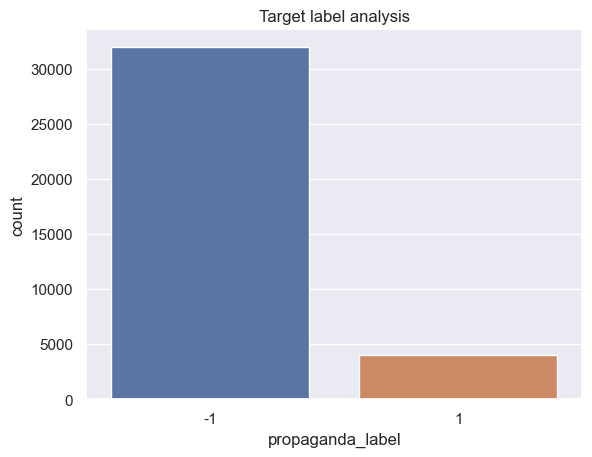

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
count_plt = sns.countplot(x=train_data['propaganda_label'], data=train_data['propaganda_label'])
count_plt.set_title('Target label analysis')
plt.show()

In [19]:
train_data['propaganda_label'].nunique()

2

# Text Preprocessing



In [20]:
## checking a sample
train_data['text'][100]

'Prosecutors filed felony charges on Wednesday against an immigrant illegally living in the U.S. who is suspected in a drunken-driving crash that killed Indianapolis Colts linebacker Edwin Jackson and an Uber driver.  Manuel Orrego-Savala, who is from Guatemala and has twice been deported from the U.S., is charged with causing death while driving intoxicated and leaving the scene of an accident. The 37-year-old said little during his initial court hearing, responding through an interpreter as the judge explained the proceedings and charges.  "He\'s very distraught to say the least," said his lawyer, Jorge Torres. "He\'s very confused."  Investigators said Orrego-Savala was driving the pickup truck that hit Jackson and his Uber driver, 54-year-old Jeffrey Monroe, while the men were standing outside Monroe\'s car early Sunday along Interstate 70. Court documents allege a blood test conducted at a hospital determined Orrego-Savala had a blood-alcohol level of 0.19 percent, more than doubl

In [21]:
# length of the text

total_words_in_100 = len(train_data['text'][100].split())
print(total_words_in_100)

605


### Lowercasing the text

In [22]:
train_data['text_preprocessed'] = train_data['text'].str.lower()


In [23]:
train_data['text_preprocessed'][100]

'prosecutors filed felony charges on wednesday against an immigrant illegally living in the u.s. who is suspected in a drunken-driving crash that killed indianapolis colts linebacker edwin jackson and an uber driver.  manuel orrego-savala, who is from guatemala and has twice been deported from the u.s., is charged with causing death while driving intoxicated and leaving the scene of an accident. the 37-year-old said little during his initial court hearing, responding through an interpreter as the judge explained the proceedings and charges.  "he\'s very distraught to say the least," said his lawyer, jorge torres. "he\'s very confused."  investigators said orrego-savala was driving the pickup truck that hit jackson and his uber driver, 54-year-old jeffrey monroe, while the men were standing outside monroe\'s car early sunday along interstate 70. court documents allege a blood test conducted at a hospital determined orrego-savala had a blood-alcohol level of 0.19 percent, more than doubl

###  Decontractions of Words

In [24]:
## deconstructions of word means won't -> will not, can't -> can not, he's -> he is

train_data['text_preprocessed'] = train_data['text_preprocessed'].str.replace(r"won\'t", "will not")\
                                        .str.replace(r"can\'t", "can not")\
                                        .str.replace(r"n\'t", " not")\
                                        .str.replace(r"\'re", " are")\
                                        .str.replace("\’s", " is")\
                                        .str.replace(r"\'d", " would")\
                                        .str.replace(r"\'ll", " will")\
                                        .str.replace(r"\'t", " not")\
                                        .str.replace(r"\'ve", " have")\
                                        .str.replace(r"\'m", " am")\
                                        .str.replace("\'s", " is")

train_data['text_preprocessed'][100]

'prosecutors filed felony charges on wednesday against an immigrant illegally living in the u.s. who is suspected in a drunken-driving crash that killed indianapolis colts linebacker edwin jackson and an uber driver.  manuel orrego-savala, who is from guatemala and has twice been deported from the u.s., is charged with causing death while driving intoxicated and leaving the scene of an accident. the 37-year-old said little during his initial court hearing, responding through an interpreter as the judge explained the proceedings and charges.  "he is very distraught to say the least," said his lawyer, jorge torres. "he is very confused."  investigators said orrego-savala was driving the pickup truck that hit jackson and his uber driver, 54-year-old jeffrey monroe, while the men were standing outside monroe is car early sunday along interstate 70. court documents allege a blood test conducted at a hospital determined orrego-savala had a blood-alcohol level of 0.19 percent, more than doubl

### Removing special characters and punctuations

In [25]:
# r'[^\w\s]' works in the context of removing non-word characters such as 'Hello, World! 123' => 'Hello World 123'
train_data['text_preprocessed'] = train_data['text_preprocessed'].str.replace(r'-',' ').str.replace(r'[^\w\s]', '')


train_data['text_preprocessed'][100]

'prosecutors filed felony charges on wednesday against an immigrant illegally living in the us who is suspected in a drunken driving crash that killed indianapolis colts linebacker edwin jackson and an uber driver  manuel orrego savala who is from guatemala and has twice been deported from the us is charged with causing death while driving intoxicated and leaving the scene of an accident the 37 year old said little during his initial court hearing responding through an interpreter as the judge explained the proceedings and charges  he is very distraught to say the least said his lawyer jorge torres he is very confused  investigators said orrego savala was driving the pickup truck that hit jackson and his uber driver 54 year old jeffrey monroe while the men were standing outside monroe is car early sunday along interstate 70 court documents allege a blood test conducted at a hospital determined orrego savala had a blood alcohol level of 019 percent more than double indiana is legal limi

# Removing numbers and digits

In [26]:
# Only 1 word here.=> Only word here.
train_data['text_preprocessed'] = train_data['text_preprocessed'].apply(lambda x: ' '.join([i for i in x.split() if not i.isdigit()]))


train_data['text_preprocessed'][100]

'prosecutors filed felony charges on wednesday against an immigrant illegally living in the us who is suspected in a drunken driving crash that killed indianapolis colts linebacker edwin jackson and an uber driver manuel orrego savala who is from guatemala and has twice been deported from the us is charged with causing death while driving intoxicated and leaving the scene of an accident the year old said little during his initial court hearing responding through an interpreter as the judge explained the proceedings and charges he is very distraught to say the least said his lawyer jorge torres he is very confused investigators said orrego savala was driving the pickup truck that hit jackson and his uber driver year old jeffrey monroe while the men were standing outside monroe is car early sunday along interstate court documents allege a blood test conducted at a hospital determined orrego savala had a blood alcohol level of percent more than double indiana is legal limit for driving th

### Removing stopwords

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\szilv\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
# common stopwords in English include words like "the," "and," "in," "of," "a," "to," "is," "it," "that," and "I."

In [28]:
from nltk.corpus import stopwords

stopword_list = sorted(stopwords.words('english'))


train_data['text_preprocessed'] = train_data['text_preprocessed'].apply(lambda x: ' '.join(e for e in x.split() if e not in stopword_list))


train_data['text_preprocessed'][100]

'prosecutors filed felony charges wednesday immigrant illegally living us suspected drunken driving crash killed indianapolis colts linebacker edwin jackson uber driver manuel orrego savala guatemala twice deported us charged causing death driving intoxicated leaving scene accident year old said little initial court hearing responding interpreter judge explained proceedings charges distraught say least said lawyer jorge torres confused investigators said orrego savala driving pickup truck hit jackson uber driver year old jeffrey monroe men standing outside monroe car early sunday along interstate court documents allege blood test conducted hospital determined orrego savala blood alcohol level percent double indiana legal limit driving two serious charges carry maximum sentence years prison orrego savala deported living illegally us time crash according investigators charged late tuesday federal prosecutors illegal entry previously deported alien faces years prison charge us attorney of

### Lemmatization - Greekword 'lemma' means root

In [38]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\szilv\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\szilv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
# The word "running" may be lemmatized to its base form, "run."
# The word "better" may be lemmatized to its base form, "good."

In [41]:
wnl = WordNetLemmatizer()


train_data['text_preprocessed'] = train_data['text_preprocessed'].apply(lambda x: ' '.join(wnl.lemmatize(word) for word in x.split()))


train_data['text_preprocessed'][100]

'prosecutor filed felony charge wednesday immigrant illegally living u suspected drunken driving crash killed indianapolis colt linebacker edwin jackson uber driver manuel orrego savala guatemala twice deported u charged causing death driving intoxicated leaving scene accident year old said little initial court hearing responding interpreter judge explained proceeding charge distraught say least said lawyer jorge torres confused investigator said orrego savala driving pickup truck hit jackson uber driver year old jeffrey monroe men standing outside monroe car early sunday along interstate court document allege blood test conducted hospital determined orrego savala blood alcohol level percent double indiana legal limit driving two serious charge carry maximum sentence year prison orrego savala deported living illegally u time crash according investigator charged late tuesday federal prosecutor illegal entry previously deported alien face year prison charge u attorney office said would h

In [37]:
# length of the text after preprocessing

total_words_in_100_after_prepro = len(train_data['text_preprocessed'].values[100].split())
print(total_words_in_100_after_prepro)

369


### Text preprocessing as a function

In [42]:
def final_preprocessing(data, stopword_list, lemma_object):

  preprocessed_text_list = []

  for sentence in data.values:

    sentence = sentence.lower()

    sentence = sentence.replace(r"won\'t", "will not")\
                                        .replace(r"can\'t", "can not")\
                                        .replace(r"n\'t", " not")\
                                        .replace(r"\'re", " are")\
                                        .replace("\’s", " is")\
                                        .replace(r"\'d", " would")\
                                        .replace(r"\'ll", " will")\
                                        .replace(r"\'t", " not")\
                                        .replace(r"\'ve", " have")\
                                        .replace(r"\'m", " am")\
                                        .replace("\'s", " is")
    sentence = sentence.replace('-',' ').replace('[^\w\s]','')

    sentence = ' '.join([i for i in sentence.split() if not i.isdigit()])

    sentence = ' '.join(e for e in sentence.split() if e not in stopword_list)

    sentence = ' '.join(lemma_object.lemmatize(word) for word in sentence.split())

    preprocessed_text_list.append(sentence)

  return preprocessed_text_list

In [45]:
len(valid_data)

5125

In [46]:
valid_data.columns

Index(['text', 'location', 'tone', 'date', 'ID', 'URL',
       'MBFC_factuality_label', 'URL.1', 'MBFC_factuality_label.1',
       'URL_to_MBFC_page', 'source_name', 'MBFC_notes_about_source',
       'MBFC_bias_label', 'source_URL', 'propaganda_label'],
      dtype='object')

In [47]:
# Applying the above fucntion on validation dataset

valid_preprocessed_list = final_preprocessing(valid_data['text'], stopword_list, wnl)

valid_data['text_preprocessed'] = valid_preprocessed_list

In [48]:
valid_data['text_preprocessed'][100]

'le week prince harry wed meghan markle, lifetime adapted couple love story film aptly titled harry & meghan: royal romance. airing last night, movie depicted relationship timeline harry meghan factual public moment milestone probably le accurate (and dramatic) behind scene love story. movie include real life event meghan harry relationship (including first blind date whisking away botswana), also some...ahem...harder believe plot line thrown well. though film stars, parisa fitz henley [meghan] murray fraser [harry], resembled real life counterpart pretty well, several scene bet almost certainly occur matter accurate cast resemblance was. below, we\'re breaking dramatic, lifetime moment movie probably, absolutely, definitely happen real life. 1) harry meghan almost got attacked lion africa. trip botswana around 20th anniversary princess diana death, couple dramatically confronted angry lion run outside middle night fight. near death experience, course, cause make immediately. honestly,

In [49]:
len(valid_data['text_preprocessed'][100])

3083

In [50]:
len(test_data)

10159

In [51]:
# Applying the above fucntion on test dataset

test_preprocessed_list = final_preprocessing(test_data['text'], stopword_list, wnl)
test_data['text_preprocessed'] = test_preprocessed_list

In [53]:
test_data['text_preprocessed'][100]

'u immigration agency kept congolese asylum seeker daughter nearly four months, lawsuit alleges. u immigration authority held congolese asylum seeker seven year old daughter separate detention centre months, new lawsuit alleges, stoking fear donald trump administration plan keep family apart bid stem asylum requests. claim filed monday u district court california, american civil liberty union (aclu) said mother daughter detained since arrived filed asylum san diego november last year. known "ms. l" court filing, woman fled violence native democratic republic congo, wracked political instability, armed clash increasing humanitarian crisis. mother detained san diego area, child held 3,000km away chicago, aclu said. "the trump administration using little girl mother pawn draconian public policy experiment," said lee gelernt, deputy director aclu immigrants\' right project, statement. lawsuit accuses u immigration custom enforcement department homeland security, among others, violating pla

In [54]:
len(test_data['text_preprocessed'][100])

1960

In [55]:
# Saving the preprocessed text data

train_prepro_df = pd.DataFrame(train_data, columns=['text_preprocessed', 'propoganda_label'])

train_prepro_df.to_csv('preprocessed_train_data.csv', index=False)

valid_prepro_df = pd.DataFrame(valid_data, columns=['text_preprocessed', 'propoganda_label'])

valid_prepro_df.to_csv('preprocessed_valid_data.csv', index=False)

test_prepro_df = pd.DataFrame(test_data, columns=['text_preprocessed', 'propoganda_label'])

test_prepro_df.to_csv('preprocessed_test_data.csv', index=False)

In [56]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 540D-C19B

 Directory of C:\Users\szilv\OneDrive\Desktop\Private\S\NLP

09/11/2023  21:55    <DIR>          .
09/11/2023  21:06    <DIR>          ..
09/11/2023  21:09    <DIR>          .ipynb_checkpoints
08/11/2023  13:34        56,105,056 NLP_data.rar
09/11/2023  21:54           131,112 NLP_Project.ipynb
09/11/2023  21:55        27,321,631 preprocessed_test_data.csv
09/11/2023  21:55        87,807,213 preprocessed_train_data.csv
09/11/2023  21:55        13,615,599 preprocessed_valid_data.csv
08/11/2023  13:23           159,474 project.ipynb
08/11/2023  13:23        20,433,796 proppy_1.0.dev.tsv
08/11/2023  13:24        40,999,986 proppy_1.0.test.tsv
08/11/2023  13:24       146,748,161 proppy_1.0.train.tsv
08/11/2023  13:23             2,605 README.md
              10 File(s)    393,324,633 bytes
               3 Dir(s)  195,302,133,760 bytes free
